In [1]:
# Data Science
import numpy as np
import pandas as pd
from scipy import stats

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
def clean(data):
    data["FamilyMembers"] = data["SibSp"] + data["Parch"]
    
    data = data.drop(["Sex", "Embarked",
                      "Ticket", "Cabin",
                      "Name", "PassengerId",
                      "SibSp", "Parch"], axis = 1)
    
    return data.dropna().reset_index(drop=True)

In [5]:
data = clean(data)

In [6]:
data

,Survived,Pclass,Age,Fare,FamilyMembers
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,1
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,1
4,0,3,35.0,8.0500,0
...,...,...,...,...,...
709,0,3,39.0,29.1250,5
710,0,2,27.0,13.0000,0
711,1,1,19.0,30.0000,0
712,1,1,26.0,30.0000,0


## Pclass

### 1. Класифікація

Це скалярна кількісна дискретна змінна.

### 2. Графічне представлення емпіричної функції щільності / полігону частот

[Text(0.5, 0, 'Class'),
 Text(0, 0.5, 'Number of passengers'),
 Text(0.5, 1.0, 'Frequency polygon')]

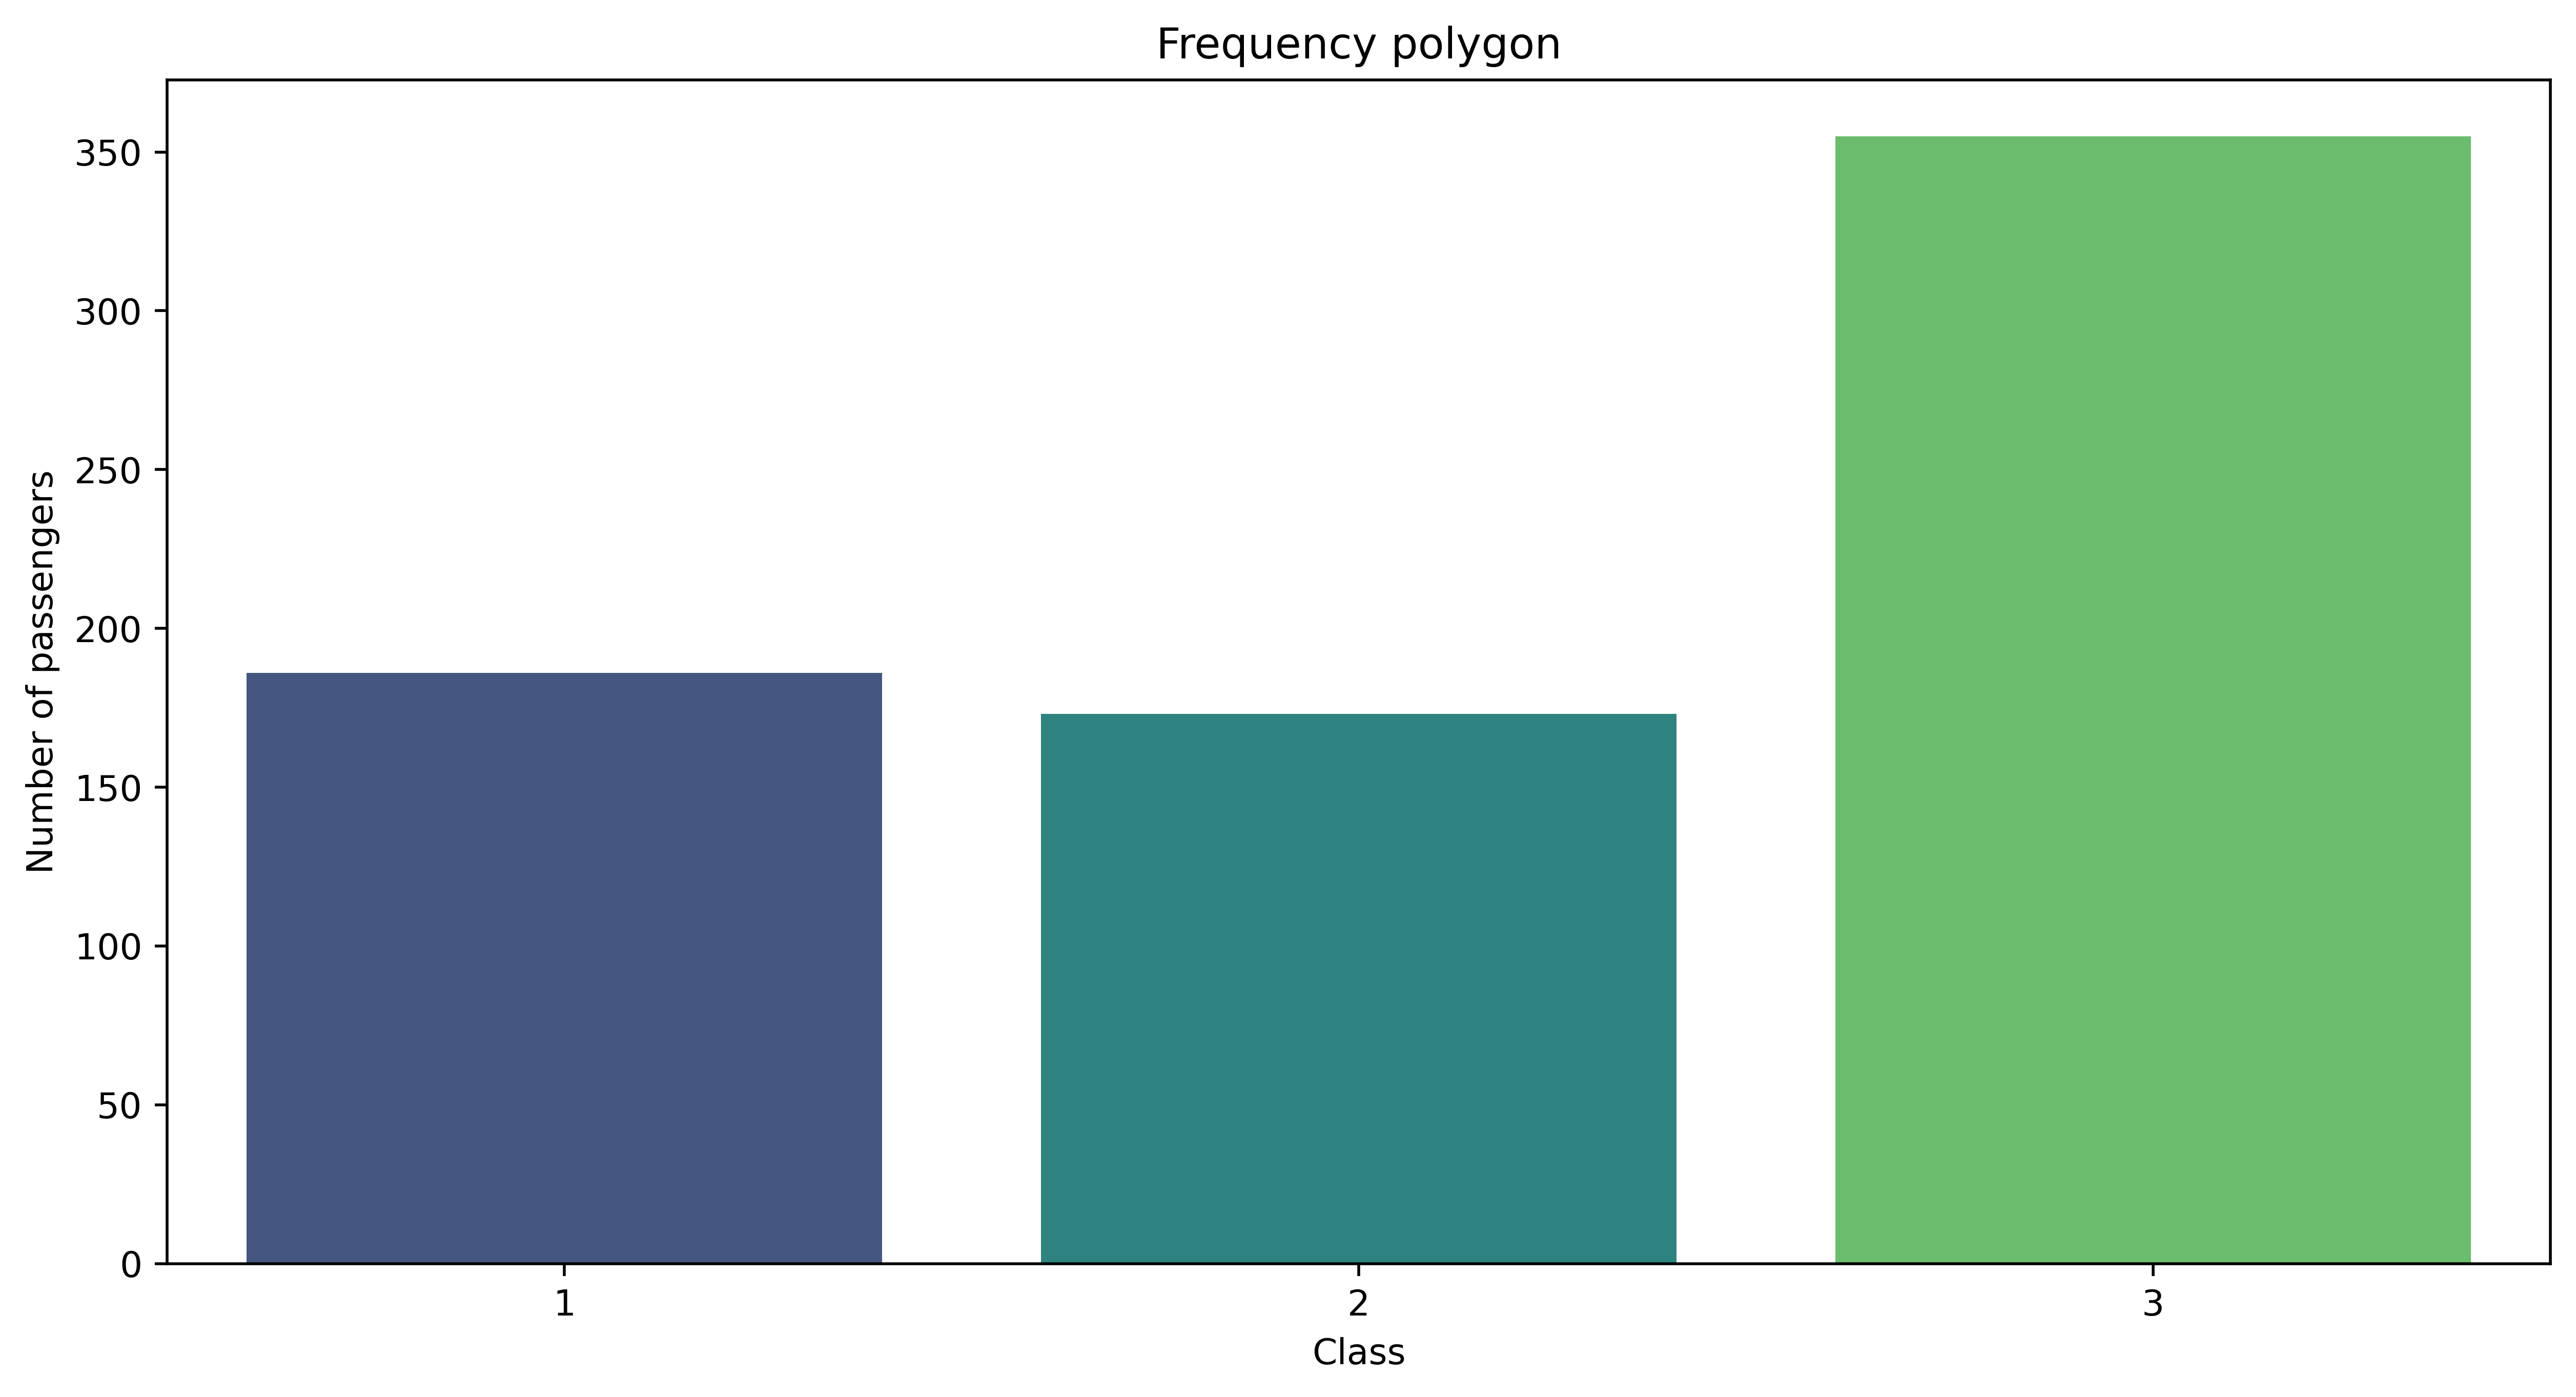

In [7]:
fig = plt.gcf()
fig.set_size_inches(12, 6)
fig.set_dpi(500)
ax = sns.barplot(x=data["Pclass"].unique(), y=data["Pclass"].value_counts(), palette="viridis")
ax.set(xlabel='Class',
       ylabel='Number of passengers',
       title='Frequency polygon')

AxesSubplot(0.125,0.11;0.775x0.77)


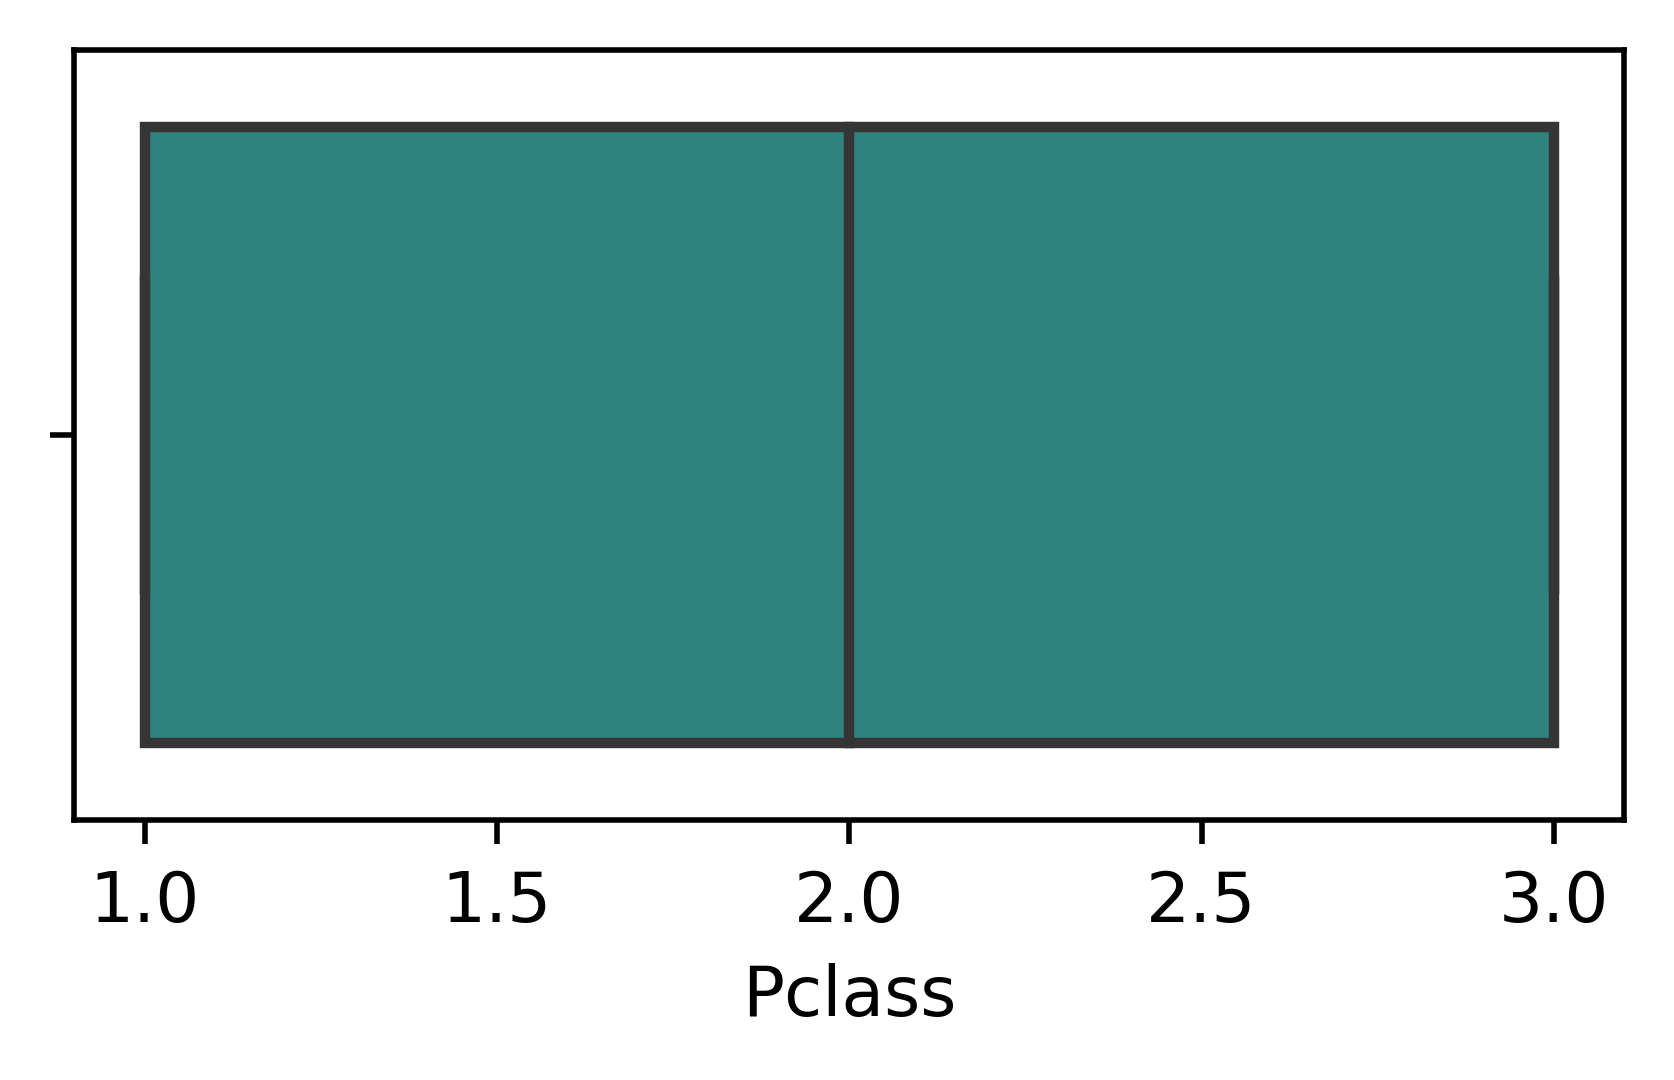

In [8]:
# 3. Зображення "скринька з вусами"
fig = plt.gcf()
fig.set_size_inches(4, 2)
fig.set_dpi(500)
print(sns.boxplot(x=data["Pclass"], palette="viridis"))

## Age

### 1. Класифікація

Це скалярна кількісна неперервна змінна.

### 2. Графічне представлення емпіричної функції щільності / полігону частот

[Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Density function')]

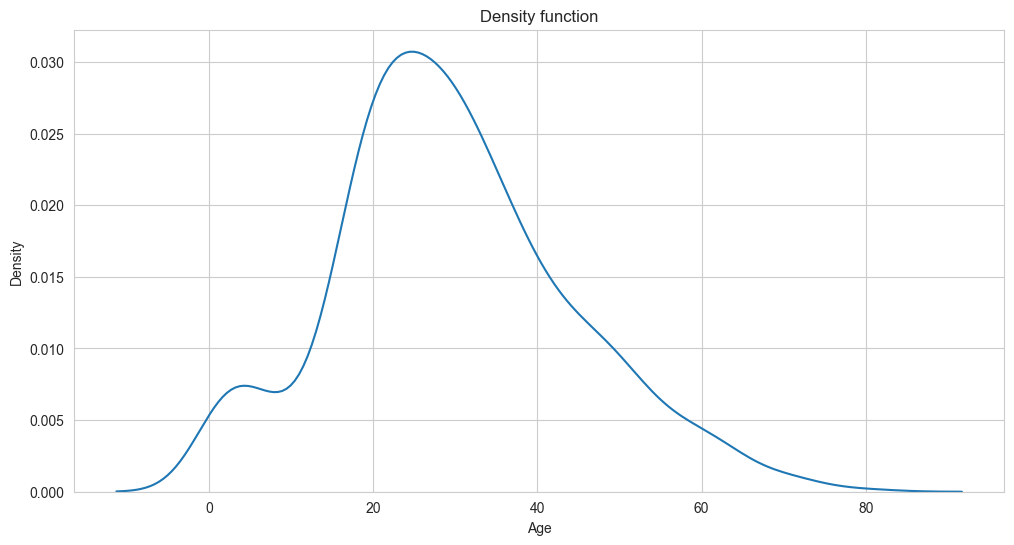

In [9]:
fig = plt.gcf()
fig.set_size_inches(12, 6)
sns.set_style('whitegrid')
ax = sns.kdeplot(np.array(data["Age"]))
ax.set(xlabel='Age',
       title='Density function')

AxesSubplot(0.125,0.11;0.775x0.77)


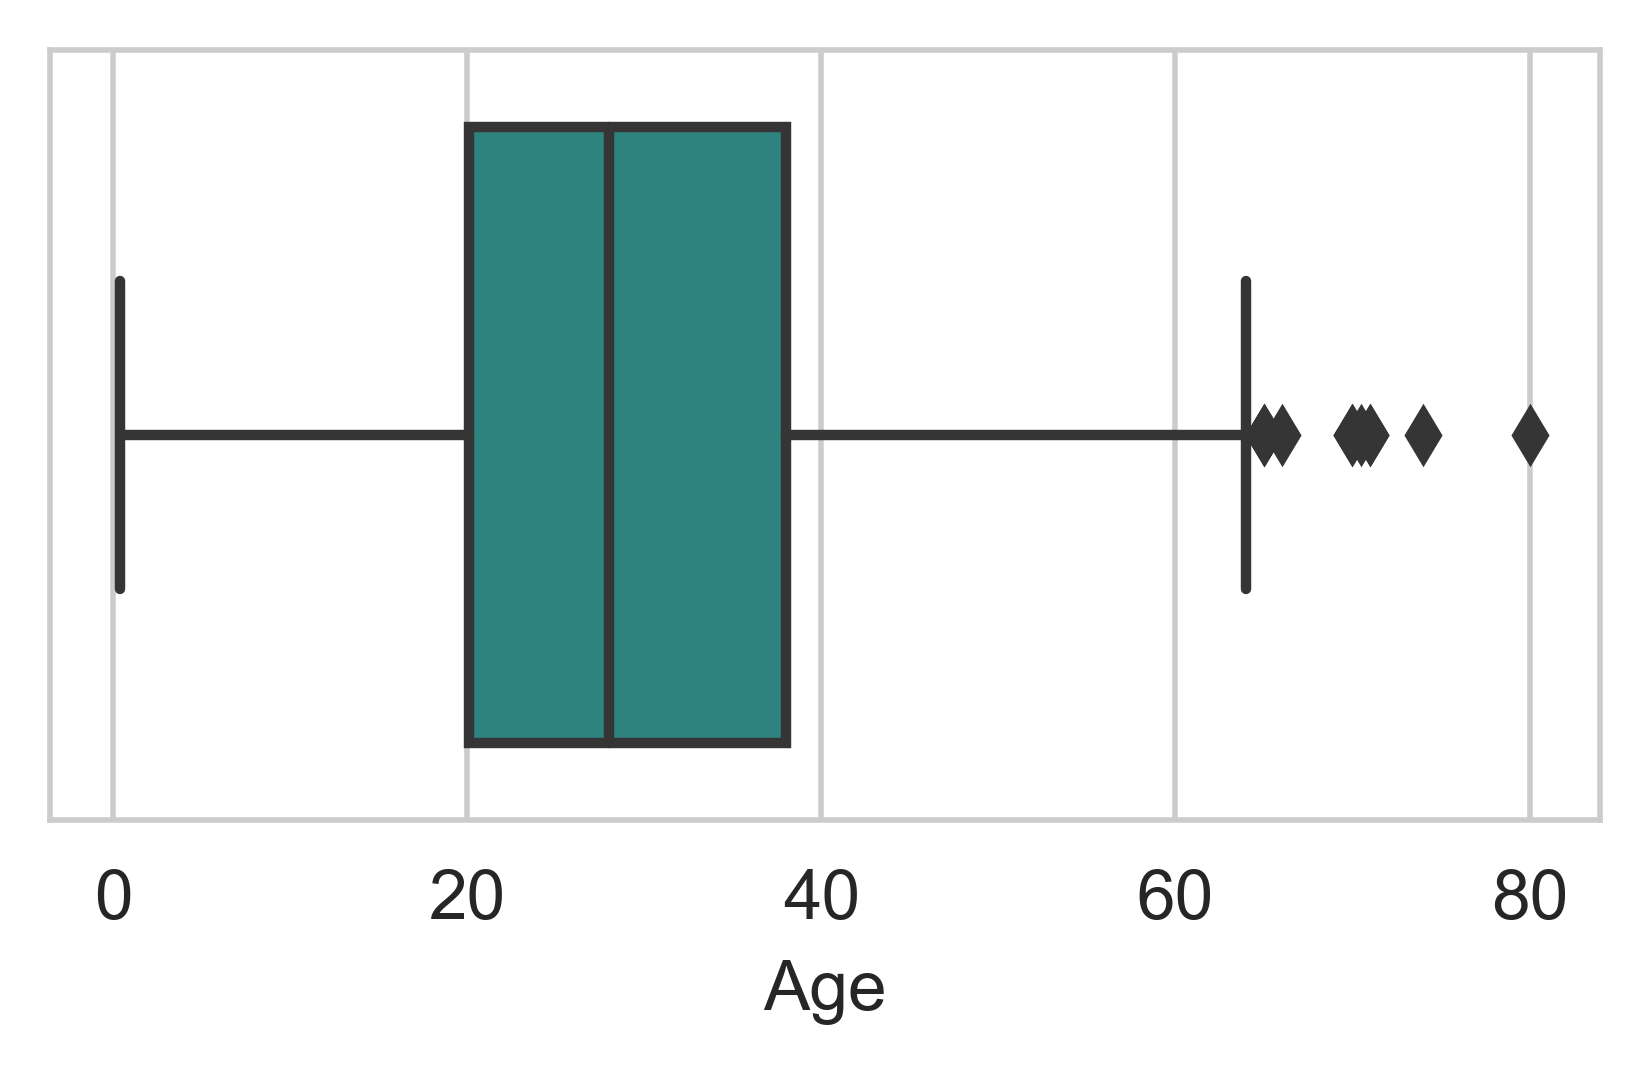

In [10]:
# 3. Зображення "скринька з вусами"
fig = plt.gcf()
fig.set_size_inches(4, 2)
fig.set_dpi(500)
print(sns.boxplot(x=data["Age"], palette="viridis"))

## Fare

### 1. Класифікація

Це скалярна кількісна неперервна змінна.

### 2. Графічне представлення емпіричної функції щільності / полігону частот

[Text(0.5, 0, 'Fare'), Text(0.5, 1.0, 'Density function')]

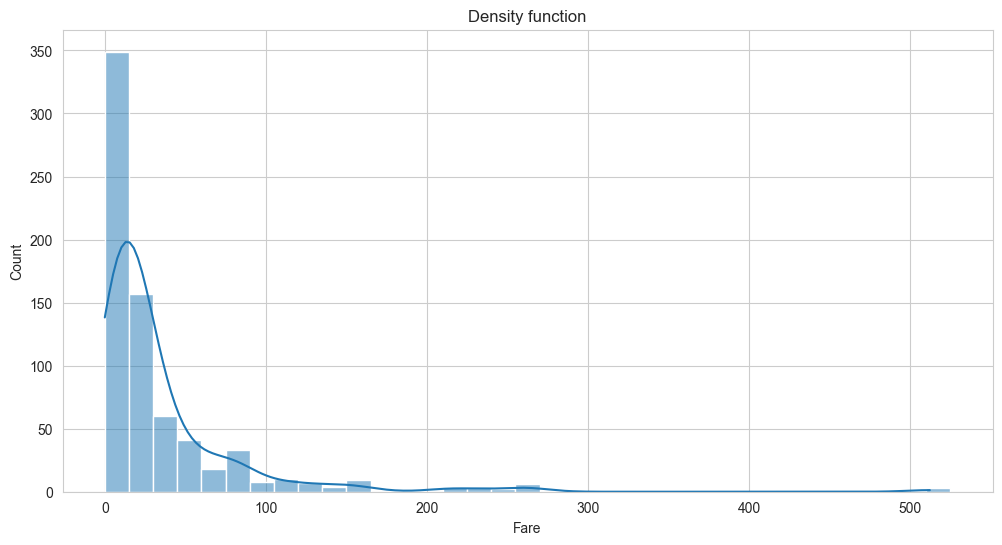

In [11]:
fig = plt.gcf()
fig.set_size_inches(12, 6)
sns.set_style('whitegrid')
ax = sns.histplot(np.array(data["Fare"]), kde=True, binwidth=15)
ax.set(xlabel='Fare',
       title='Density function')

AxesSubplot(0.125,0.11;0.775x0.77)


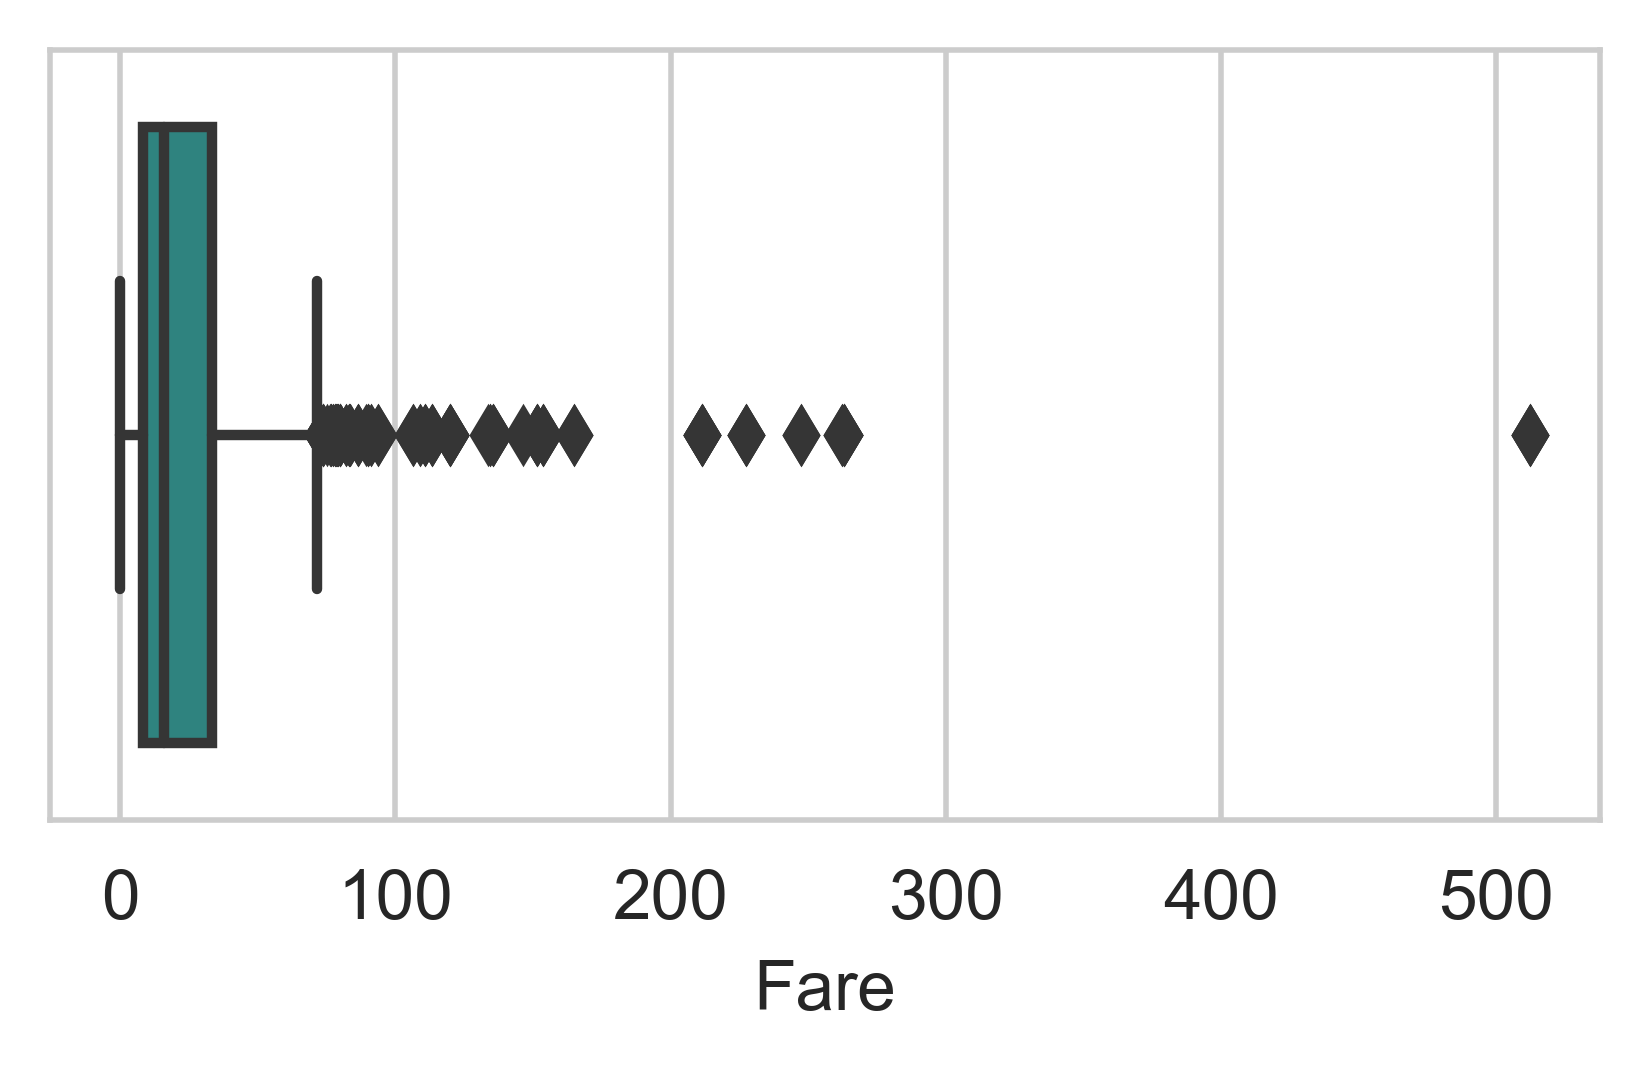

In [12]:
# 3. Зображення "скринька з вусами"
fig = plt.gcf()
fig.set_size_inches(4, 2)
fig.set_dpi(500)
print(sns.boxplot(x=data["Fare"], palette="viridis"))

## FamilyMembers

### 1. Класифікація

Це скалярна кількісна дискретна змінна.

### 2. Графічне представлення емпіричної функції щільності / полігону частот

[Text(0.5, 0, 'FamilyMembers'),
 Text(0, 0.5, 'Number families'),
 Text(0.5, 1.0, 'Frequency polygon')]

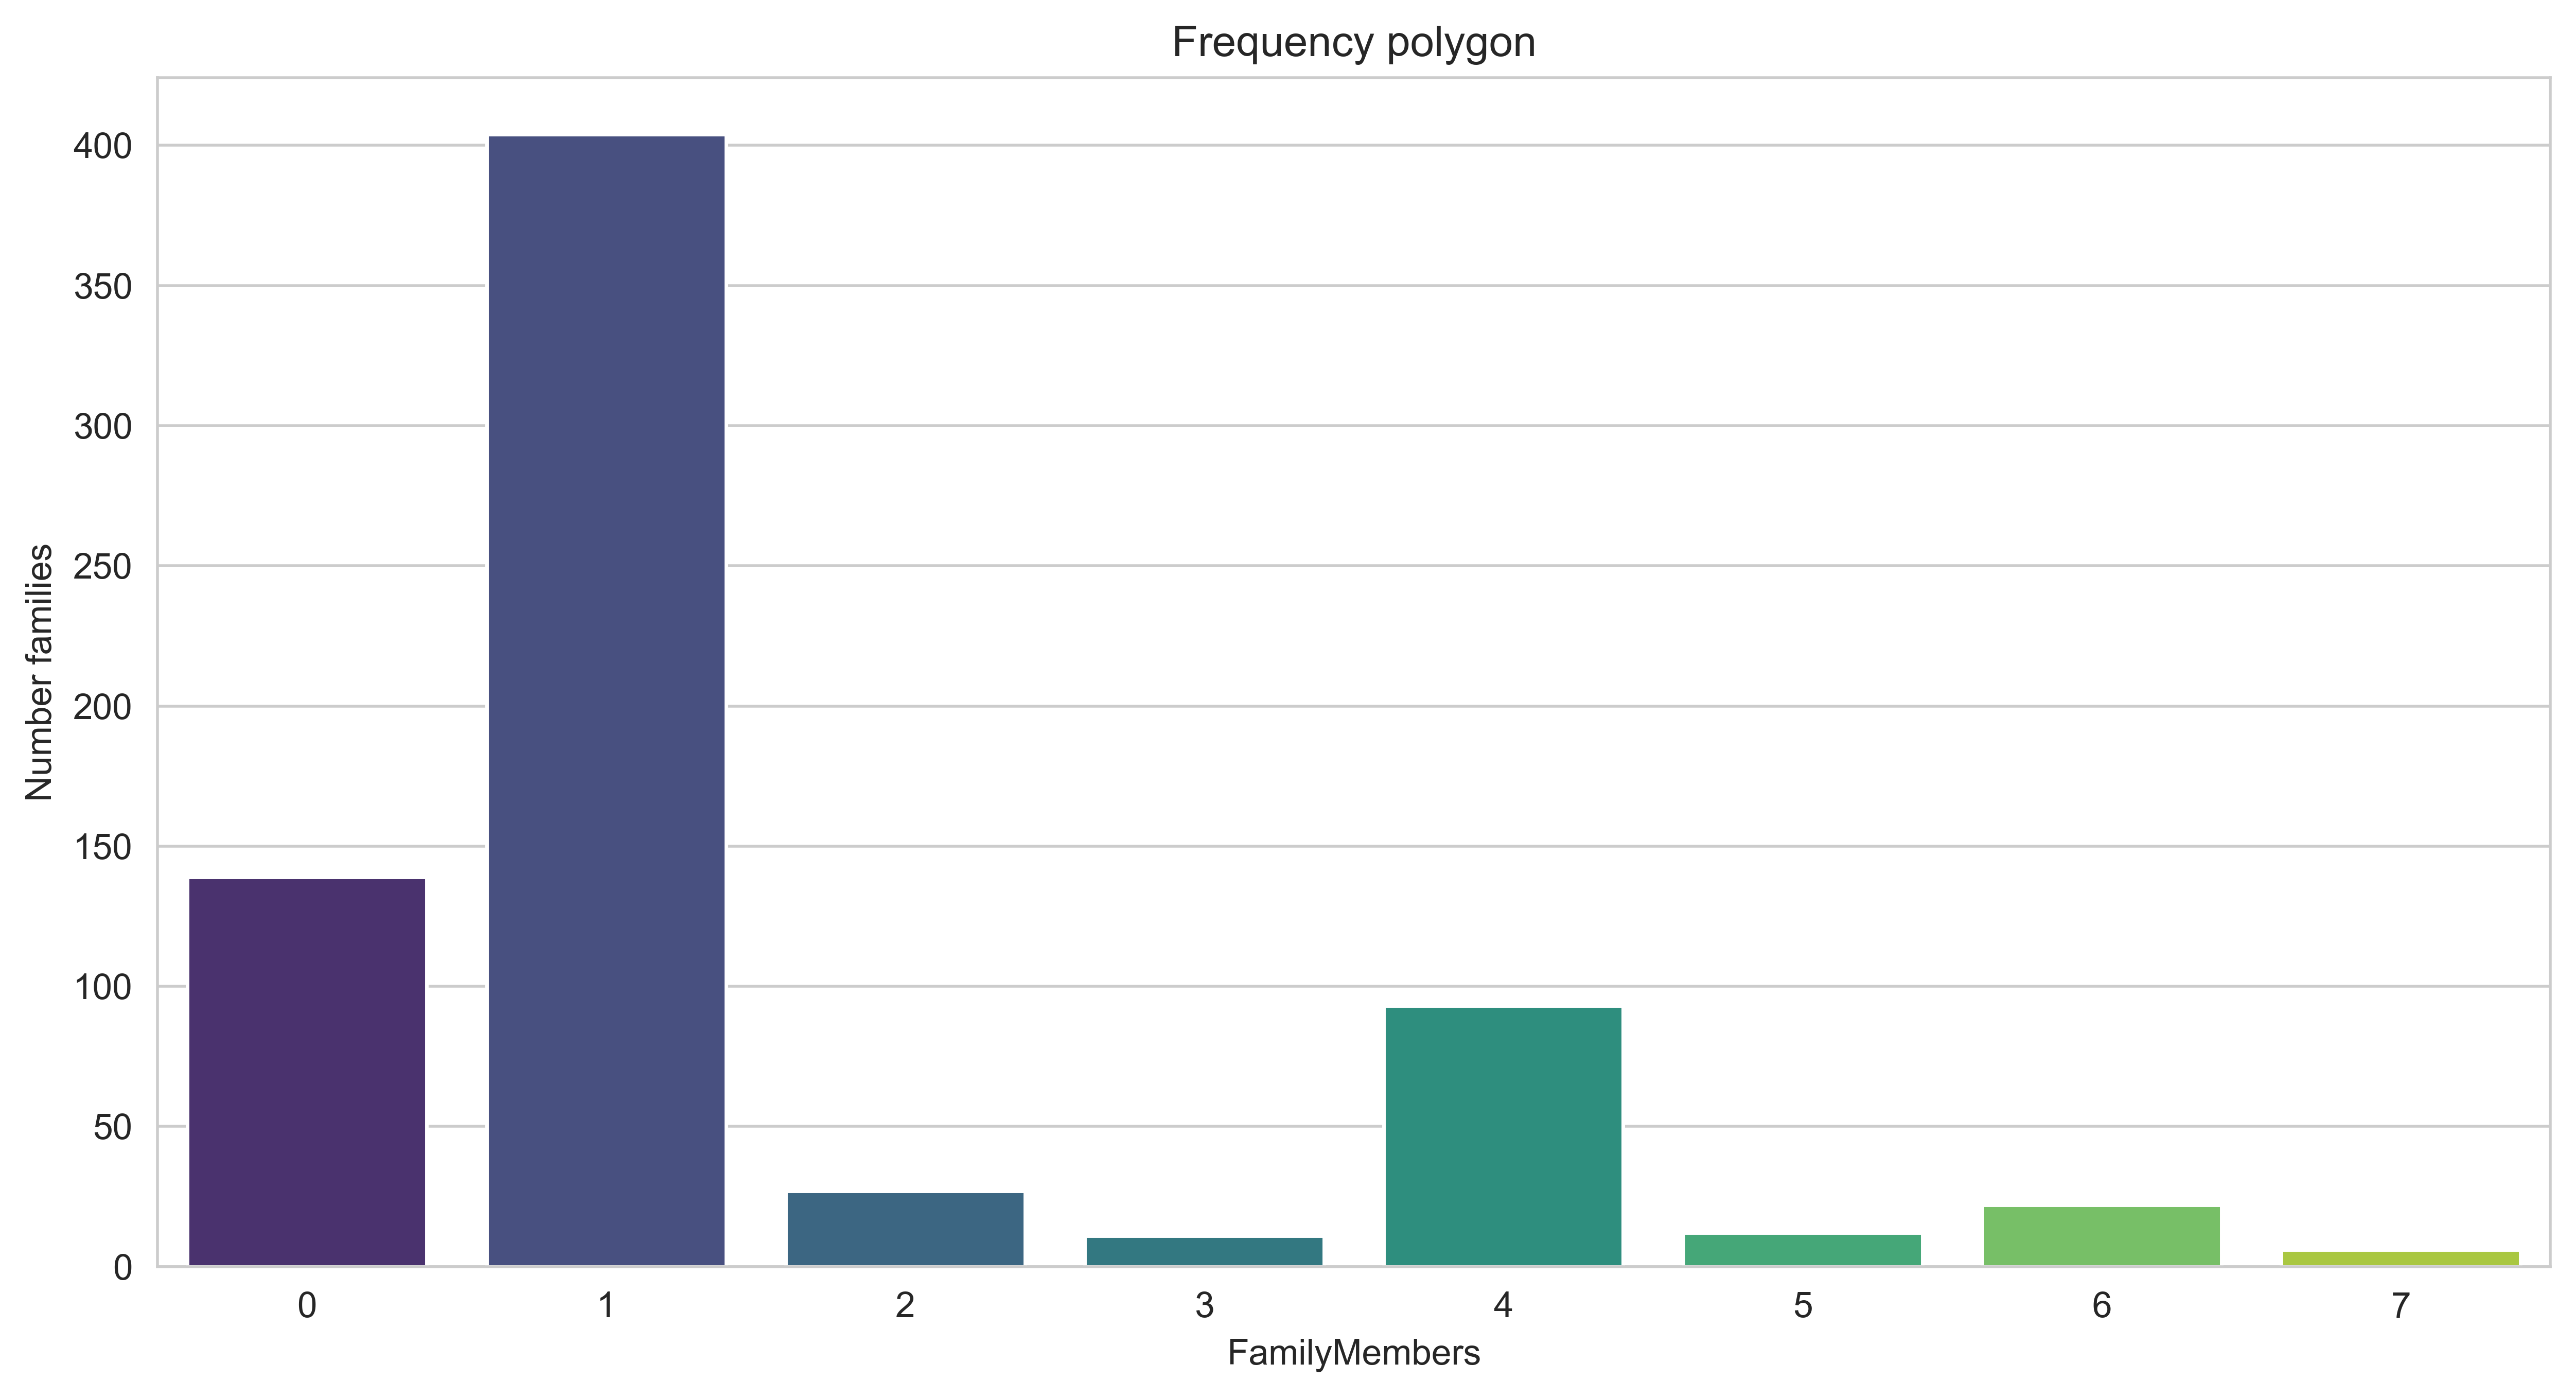

In [13]:
fig = plt.gcf()
fig.set_size_inches(12, 6)
fig.set_dpi(500)
ax = sns.barplot(x=data["FamilyMembers"].unique(), y=data["FamilyMembers"].value_counts(), palette="viridis")
ax.set(xlabel='FamilyMembers',
       ylabel='Number families',
       title='Frequency polygon')

AxesSubplot(0.125,0.11;0.775x0.77)


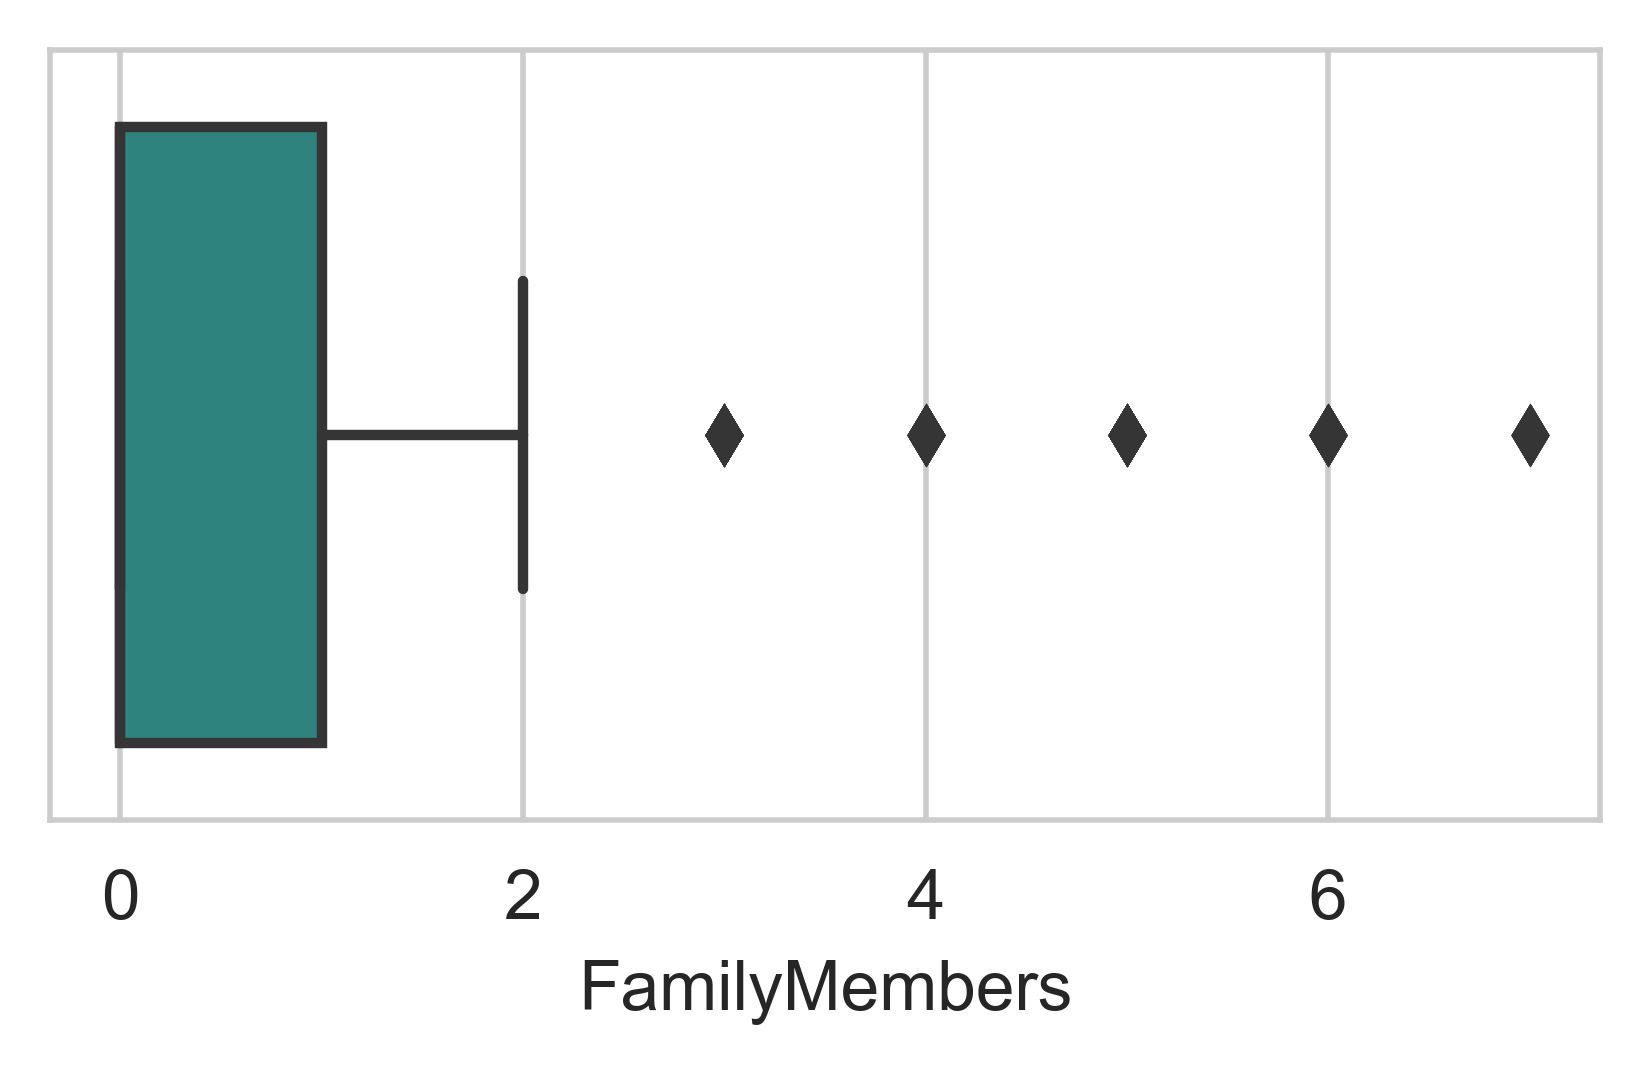

In [14]:
# 3. Зображення "скринька з вусами"
fig = plt.gcf()
fig.set_size_inches(4, 2)
fig.set_dpi(500)
print(sns.boxplot(x=data["FamilyMembers"], palette="viridis"))

## Survived

### 1. Класифікація

Взагалі то це якісна номінальна категоризована змінна, але в даному випадку ми будемо розглядати так зване "one-hot" представлення категоризованої змінної. Оскільки вона набуває лише одного з двох значень, набір даних використовує її представлення в бінарному вигляді. З таким представленням ми й будемо працювати. Варто зазначити, що деякі характеристики імовірно буде важко ітерпретувати для цієї змінної, адже вона має якісну, а не кількісну природу.

### 2. Графічне представлення емпіричної функції щільності / полігону частот

[Text(0.5, 0, 'Survived'),
 Text(0, 0.5, 'Number passengers'),
 Text(0.5, 1.0, 'Frequency polygon')]

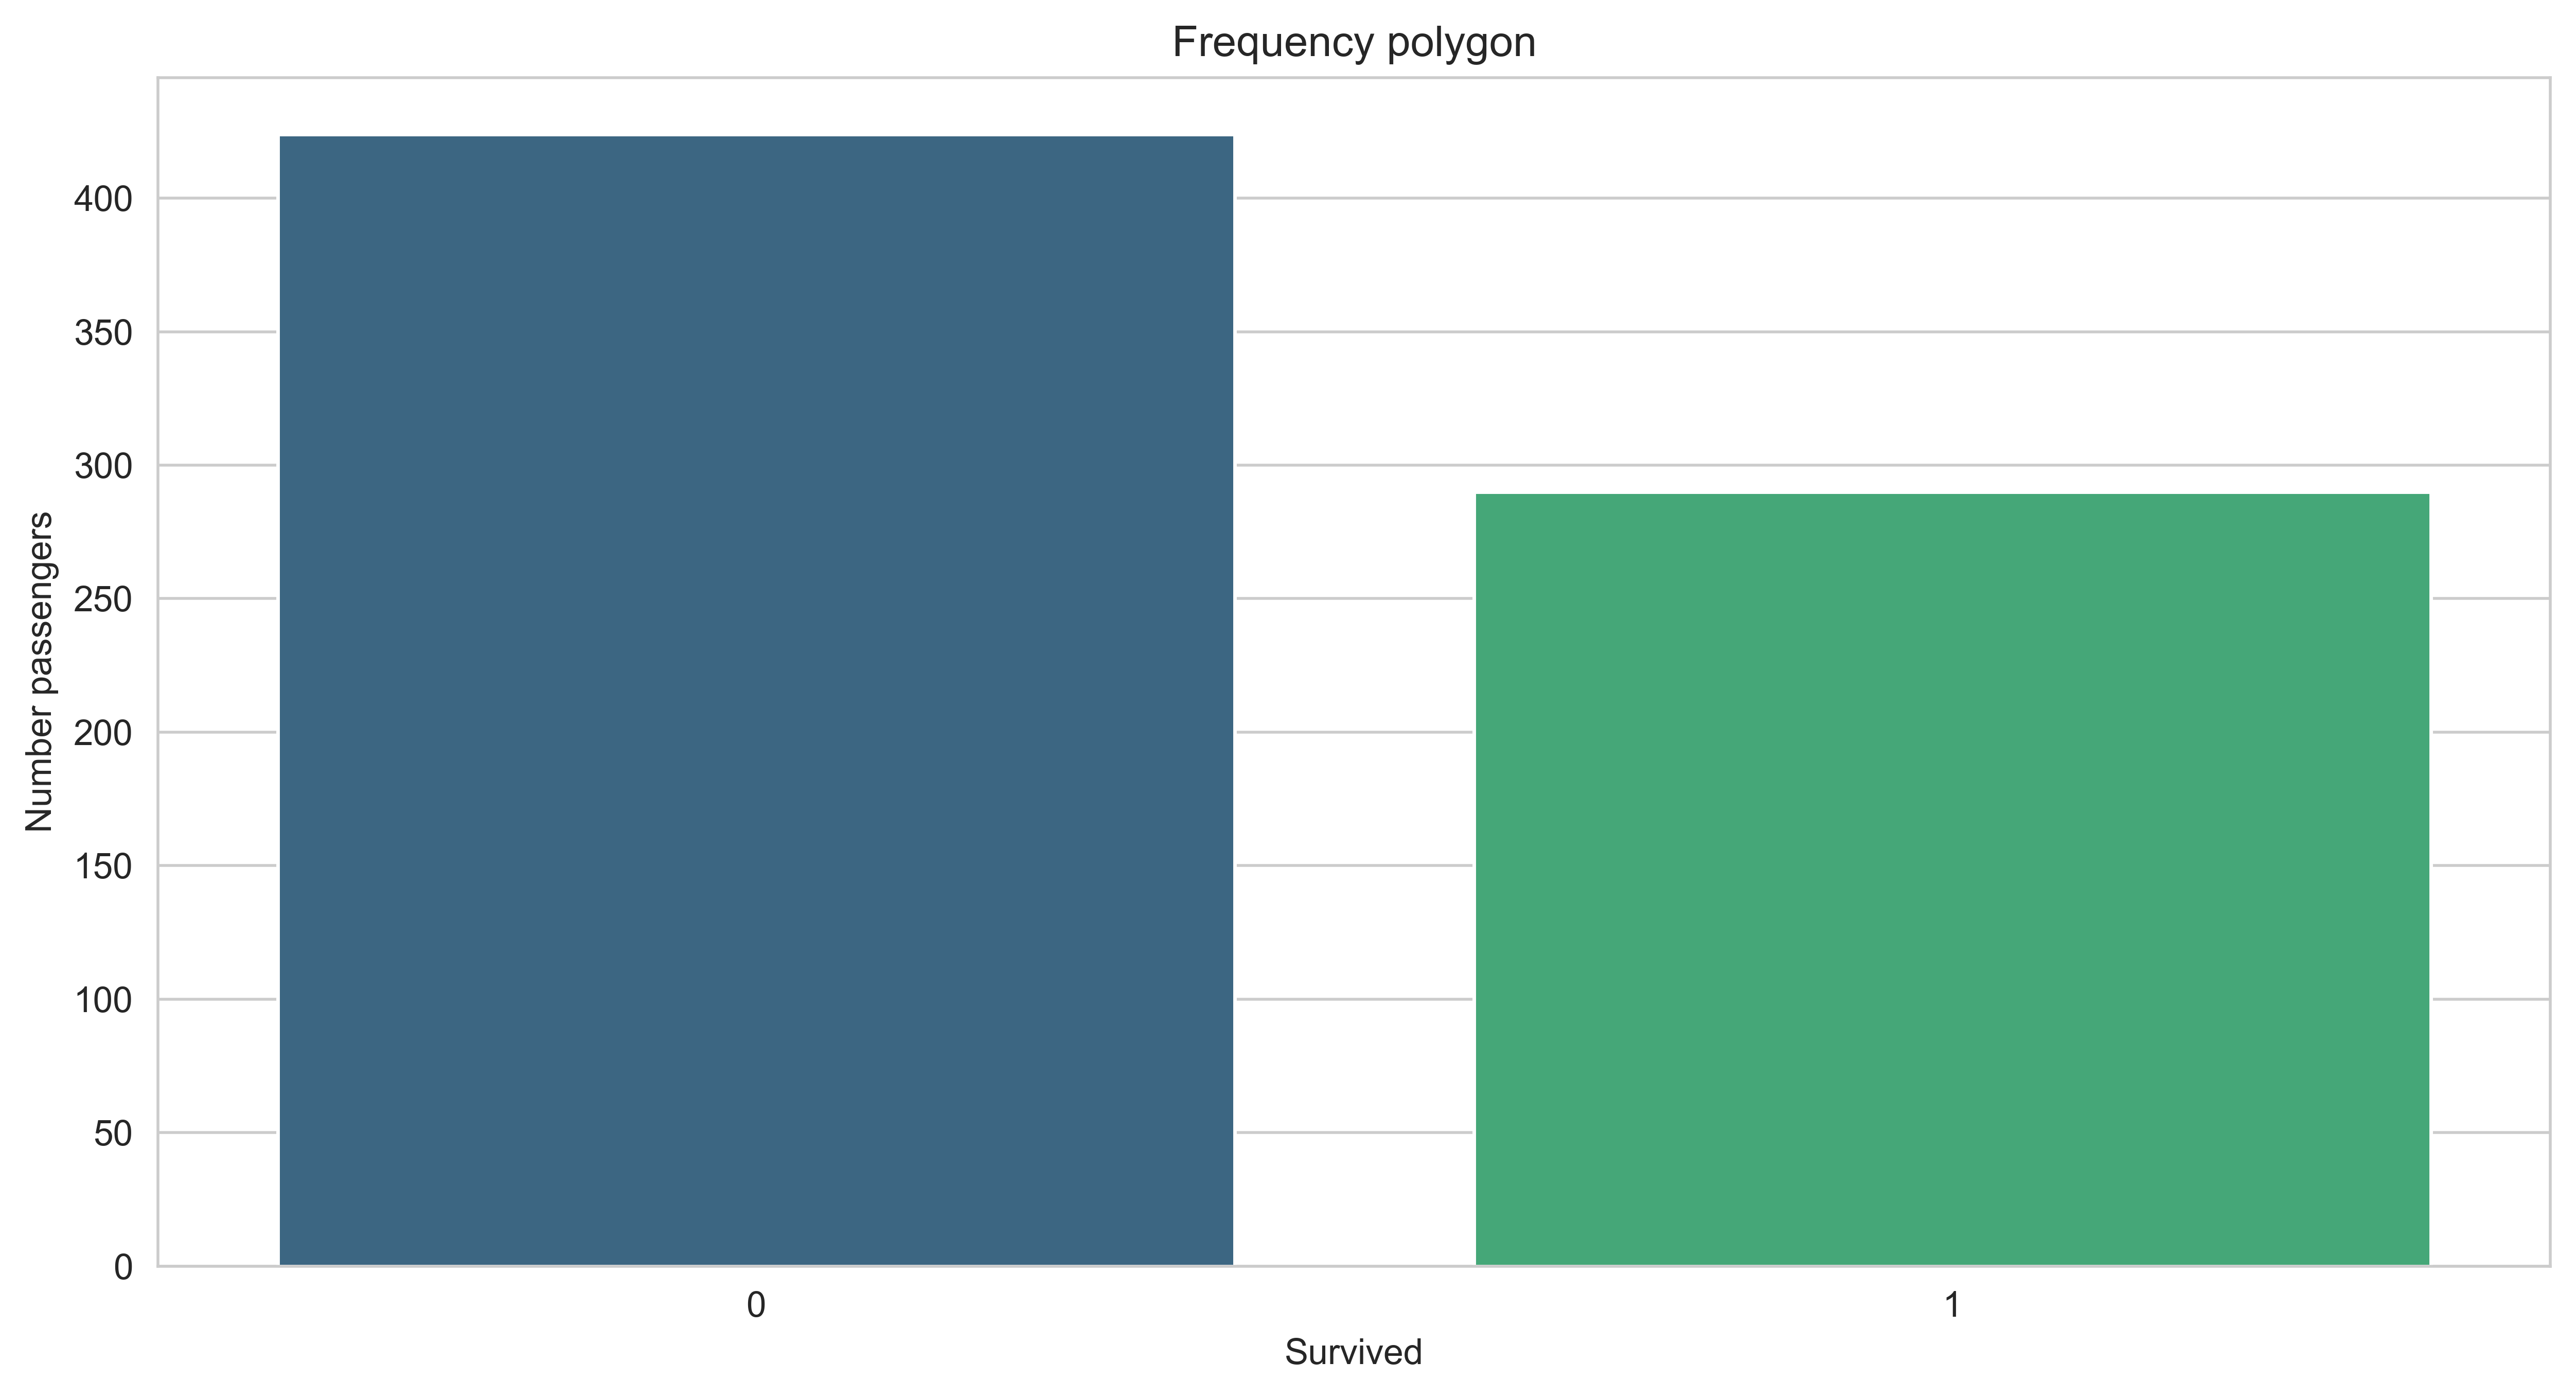

In [15]:
fig = plt.gcf()
fig.set_size_inches(12, 6)
fig.set_dpi(500)
ax = sns.barplot(x=data["Survived"].unique(), y=data["Survived"].value_counts(), palette="viridis")
ax.set(xlabel='Survived',
       ylabel='Number passengers',
       title='Frequency polygon')

AxesSubplot(0.125,0.11;0.775x0.77)


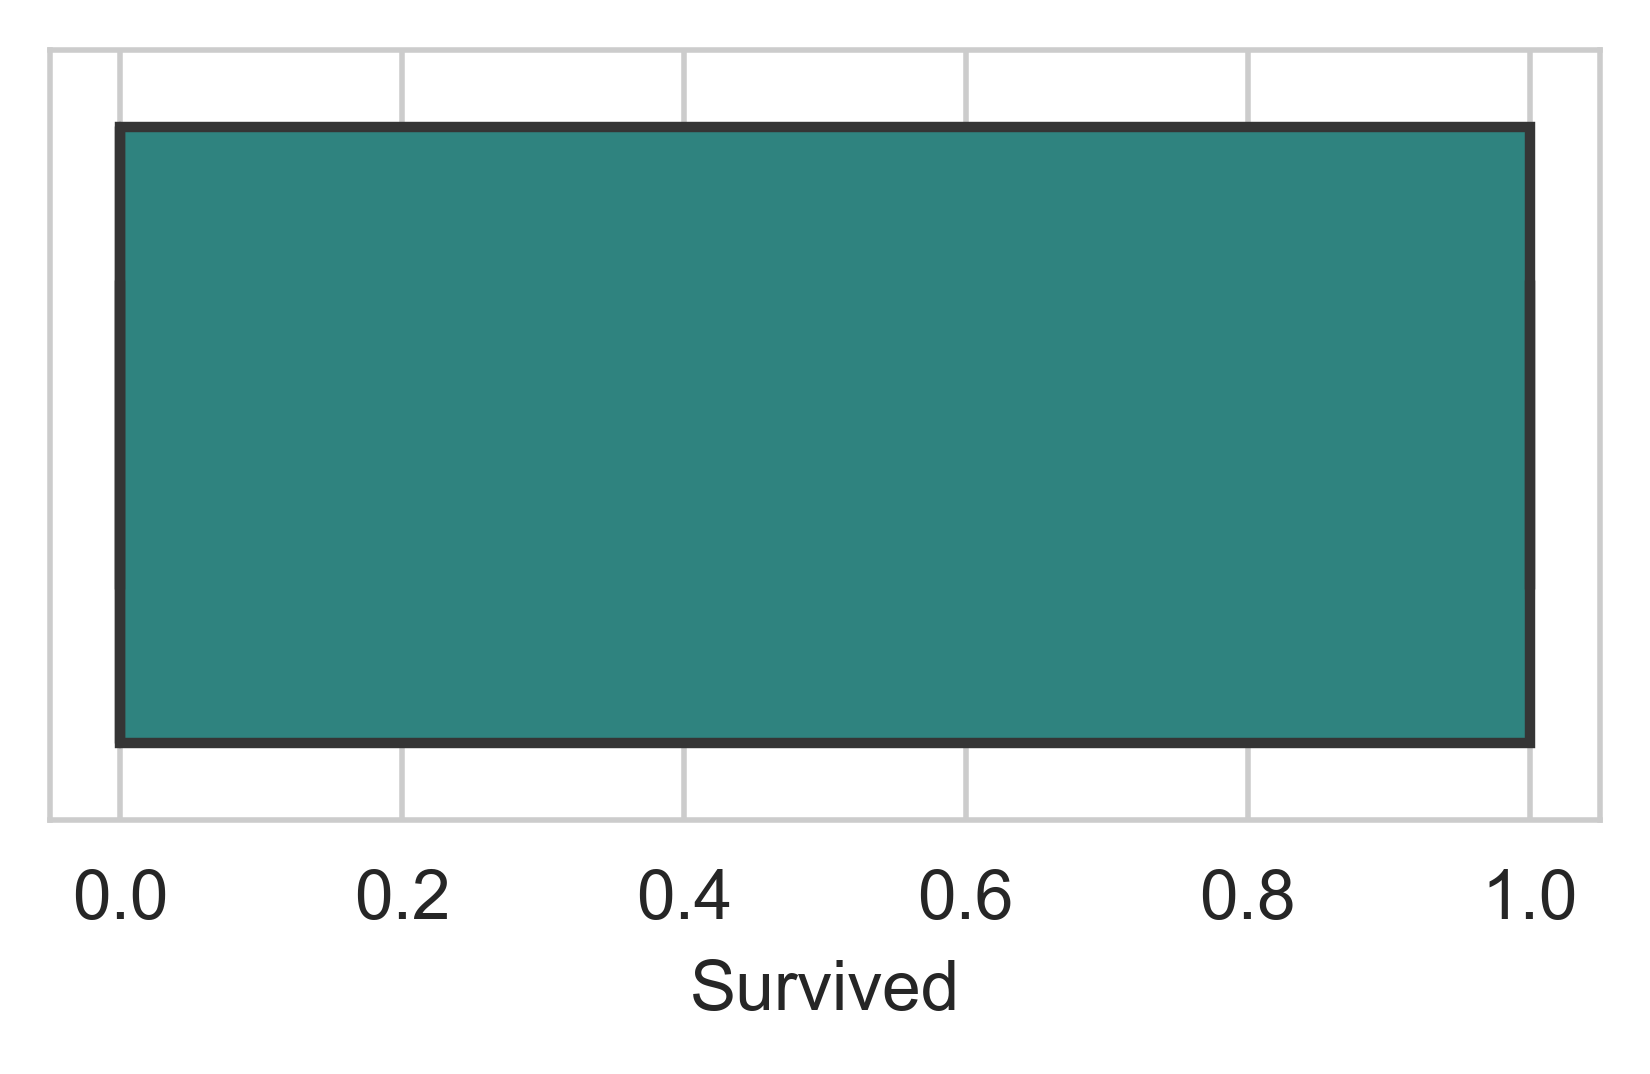

In [16]:
# 3. Зображення "скринька з вусами"
fig = plt.gcf()
fig.set_size_inches(4, 2)
fig.set_dpi(500)
print(sns.boxplot(x=data["Survived"], palette="viridis"))

In [17]:
for col in data.columns:
    print(col,"\n\n")
    # 4. Bибіркові значення: мінімального та максимального спостережень вибірки, медіани, квартилів, децилів
    print("Minimum value: ")
    minimum = data[col].min()
    print(minimum)
    
    print("Maximum value: ")
    maximum = data[col].max()
    print(maximum)
        
    med = data[col].median()
    print("Median: ")
    print(med)
    
    deciles = np.percentile(data[col],
                        np.arange(0, 100, 10))
    print("Deciles: ")
    for decile in deciles[1:]:
        print(decile, end=", ")
        
    print("First quartile: ")
    Q1 = np.percentile(data[col], 25)
    print(Q1)
    
    print("Third quartile: ")
    Q3 = np.percentile(data[col], 75)
    print(Q3)
    
    # 5. Характеристики положення центру значень змінної
    print("Expected value: ")
    M = data[col].mean()
    print(M)
    
    print("Geometric mean: ")
    print(stats.gmean(data[col]))
    
    print("Harmonic mean: ")
    print(stats.hmean(data[col]))
    
    print("Mode value: ")
    print(data[col].mode()[0])
    
    print("Quadratic mean (RMS)")
    print(np.sqrt(np.mean(np.square(data[col]))))
    
    # 6. Характеристики розсіювання значень змінної
    print("Variance: ")
    variance = np.var(data[col])
    print(variance)
    
    print("Standard deviation: ")
    print(stats.tstd(data[col]))
    
    print("Coefficient of variation: ")
    print(stats.variation(data[col]))
    
    print("Quartile deviation: ")
    print((Q3 - Q1) / 2)
    
    print("Range: ")
    print(maximum - minimum)
    
    print("Distribution configuration interval: ")
    dist_config_interval = [M - 3 * np.sqrt(variance),
                            M + 3 * np.sqrt(variance)]
    print(dist_config_interval)
    
    # 7. Аналіз скошеності та гостроверхості розподілу
    skew_coeff = stats.skew(data[col], bias=False)

    print(skew_coeff)
    if skew_coeff < 0:
        print("Коефіцієнт асиметрії менше за нуль, ",
              "тобто даний розподіл скошений праворуч")
    elif skew_coeff > 0:
        print("Коефіцієнт асиметрії більше за нуль, ",
              "тобто даний розподіл скошений ліворуч")
    else:
        print("Коефіцієнт асиметрії дорівнює нулю, ",
              "тобто даний розподіл симетричний ",
              "відносно матсподівання")
        
    kurtosis_coeff = stats.kurtosis(data[col], bias=False)

    print(kurtosis_coeff)
    if kurtosis_coeff < 0:
        print("Коефіцієнт ексцесу менше за нуль, "
        "тобто даний розподіл менш гостроверхий, "
        "ніж нормальний з відповідними параметрами")
    elif kurtosis_coeff > 0:
        print("Коефіцієнт ексцесу більше за нуль, "
        "тобто даний розподіл більш гостроверхий, "
        "ніж нормальний з відповідними параметрами")
    else:
        print("Коефіцієнт ексцесу дорівнює нулю, "
        "тобто даний розподіл нормальний")
        
    # 8. З'ясувати, чи нормально розподілена змінна
    p = 0.05
    # Shapiro-Wilk test
    p_value = stats.shapiro(data[col])[1]
    if p_value > p:
        print("Змінна нормально розподілена")
    else:
        print("Змінна не розподілена нормально")
    print(p_value)

Survived 


Minimum value: 
0
Maximum value: 
1
Median: 
0.0
Deciles: 
0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, First quartile: 
0.0
Third quartile: 
1.0
Expected value: 
0.4061624649859944
Geometric mean: 
0.0
Harmonic mean: 
0.0
Mode value: 
0
Quadratic mean (RMS)
0.6373087673851618
Variance: 
0.24119451702249717
Standard deviation: 
0.49145986433537053
Coefficient of variation: 
1.2091604382865166
Quartile deviation: 
0.5
Range: 
1
Distribution configuration interval: 
[-1.0671842875480024, 1.879509217519991]
0.38294530407997396
Коефіцієнт асиметрії більше за нуль,  тобто даний розподіл скошений ліворуч
-1.858566841431019
Коефіцієнт ексцесу менше за нуль, тобто даний розподіл менш гостроверхий, ніж нормальний з відповідними параметрами
Змінна не розподілена нормально
9.593527843818264e-37
Pclass 


Minimum value: 
1
Maximum value: 
3
Median: 
2.0
Deciles: 
1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, First quartile: 
1.0
Third quartile: 
3.0
Expected value: 
2.2366946778711485
G

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

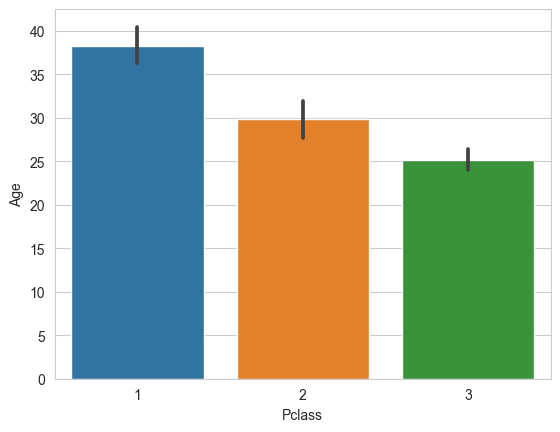

In [25]:
sns.barplot(data=data, x="Pclass", y="Age")

<AxesSubplot: xlabel='Survived', ylabel='Age'>

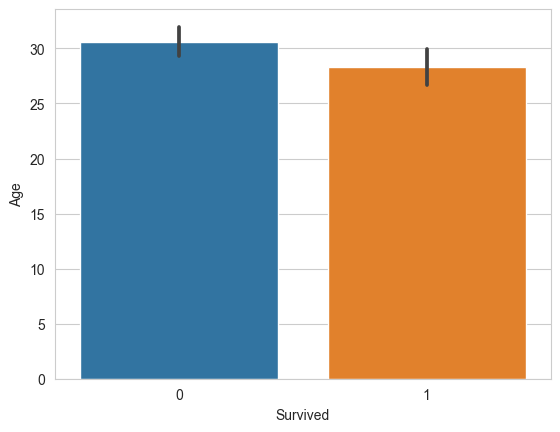

In [35]:
sns.barplot(data=data,x="Survived", y="Age")

<AxesSubplot: xlabel='Fare', ylabel='Age'>

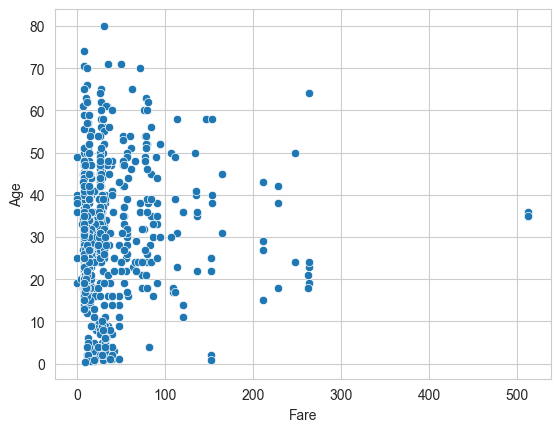

In [36]:
sns.scatterplot(data=data, x="Fare", y="Age")